# Day_03: Dataframes and Plot Themes

Today I wanted to visualize some data that I use for my [computational mechanics](https://cooperrc.github.io/computational-mechanics/module_02/README.html) course, the New York Stock Exchange data from 2010 to 2016. Its a nice set of data to load in a lot of values, parse it down based upon the [NYSE symbol](https://www.nyse.com/listings_directory/stock) and view the rise and fall of stock prices. 

I usually use [Pandas](https://pandas.pydata.org/) as my data processing/storage tool, so I stumbled upon the `CSV` and `DataFrames` packages in the Julia ecosystem. I installed via

```julia
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
```

where `CSV` could read the comma-separated value file and `DataFrames` created a similar structure to a Pandas dataframe in Julia

In [1]:
using Plots
using CSV, DataFrames
using Dates

## Import the CSV into Julia
Now, I can `CSV.read` the NYSE data as a `DataFrame` as follows,

In [2]:
nyse_df = CSV.read("./nyse-data.csv", DataFrame);

Here, I focus on just the Google stock price (`GOOGL`). I use a couple of calls to the `nyse_df` dataframe:
1. `nyse[!, "symbol"]`: this calls the column of data that has the NYSE symbols
2. `.== "GOOGL"`: this compares the left-hand-side to the string "GOOGL" and returns `true/false`
3. `nyse_df[ ... .== ..., :]`: this uses the comparison described in 1 + 2 to grab all of the columns that match the `.==` operator

In one line, these calls to `nyse_df` create `google_df` that only contains the Google open, close, low, high, and volume values from 2010 - 2016.

In [3]:
google_df = nyse_df[nyse_df[!, "symbol"] .== "GOOGL", :];

## Dates in Julia

Dates can be so frustrating in any language. In this case, all of the dates are interpreted as strings. Not the worst, but I do want the actual datetime values. I looped through each date and created datetime values in `days`. Above, I imported `Dates` so I can convert the string to a datetime.

In [4]:
days = zeros(Date, size(google_df)[1])
for (i, d) in enumerate(google_df[!, "date"])
    days[i] = Dates.Date(d)
end

## Julia plot themes

I am a big fan of plot themes. My [Matplotlib theme](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) of choice is 'fivethirtyeight'. It has thick lines and large fonts. In my experience, if a figure's fontsize in a presentation, paper, website, etc. is less than 16pt, then it is almost invisible to most people you are trying to share with. I am constantly increasing the font size in my figures to share ideas. 

In Julia, I am using the [`PlotsThemes`](https://github.com/JuliaPlots/PlotThemes.jl) package that has a nice collection of unique color palettes and design choices. I decided to write my own theme that increases all the fonts to 18 and 24 (I read somewhere that fontsizes should roughly follow the 3:4 ratio where each smaller font is 75% of the bigger font). 

For reference, I plotted the opening and closing prices of Google's stock with the `:default` theme.

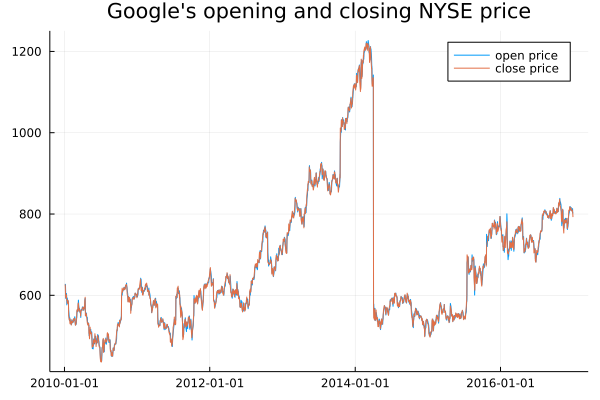

In [5]:
Plots.theme(:default)
plot(days, 
    google_df[!, "open"], 
    label = "open price",
    title = "Google's opening and closing NYSE price")
plot!(days, google_df[!, "close"], label = "close price")

Then, I made a theme that
- increased the title font to 24
- increased tick fonts to 18
- increased guide font to 18
- increased line width to 4px
- increased marker size to 10px
- _tried_ to increase legend font to 18
- placed the legend outside the plot on the top right
- removed the gridlines

here it is:

```julia
_themes[:cooper] = PlotTheme(linewidth = 4,
                             markersize = 10,
                             titlefontsize = 24,
                             guidefontsize = 18,
                             tickfontsize = 18,
                             colorbar_tickfontsize = 18,
                             legend_font_pointsize = 18,
                             legend=:outertopright,
                             grid = false
                            )
```

Then, I included the theme in `PlotThemes.jl` and created my new Google stock price figure.

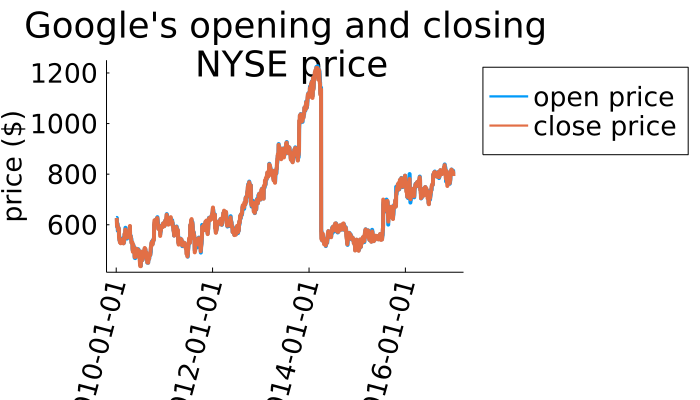

In [6]:
Plots.theme(:cooper)
plot(days, 
    google_df[!, "open"], 
    label = "open price",
    # legend_font_pointsize = 18,
    title = "Google's opening and closing\n NYSE price")
    
    # xticks = [ "2010-01-04", "2011-09-30", "2013-07-03", "2015-04-02", "2016-12-29"])
    #xticks = google_df[1:floor(Int64, end/4):end, "date"])
    # xtickfont = font(20, "Sans"),
    # xticks = 0:500:5000)
plot!(days, google_df[!, "close"], label = "close price", xrotation = 75, size = (700,400))
plot!(xlabel = "date", ylabel = "price (\$\$)")

## Using my new theme

My theme is included in my local testing environment, but I wanted to add it to my general setup in my GitHub actions. I forked the `PlotThemes` and included another call in my actions yaml:

```yaml
julia -e 'using Pkg; Pkg.add(url="https://github.com/cooperrc/PlotThemes.jl");
```

Now, I can use my own version of `PlotThemes` developed in my fork.

## Wrapping up

I've still got some work to do on building my `:cooper` theme. The title hangs down into the graph right now and the dates have too much information for what I need. The legend is _not_ responding to my calls to `legend_font_pointsize` and the `PlotThemes` package seems to pass information to `Plots` without requiring it as a dependency. 

I am proud that I was able to create a jumping-off point for my data visualization needs. I enjoyed the straightforward plot calls to quickly get data into a graph.